In [1]:
%matplotlib inline

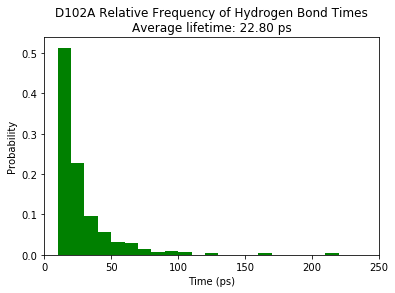

In [4]:
from matplotlib import pyplot as plt
from __future__ import division
import numpy as np

"""
Hydrogen bonds involving last frame are intentionally omitted 
since their duration cannot be calculated
"""

prev = hbond = count = 0 #prev tracks if hbond in previous frame, hbond is bond status, count is bond duration
sizes = [] #list of bond durations
with open("../D102A/hbonds_his_ser.dat") as f:
    for line in f:
        line = line.split() #splits line by whitespace
        hbond = int(line[1])
        if hbond == 1:
            count += 1
            prev = 1
        elif hbond == 0 and prev == 1: 
            #if the hbond terminates
            sizes.append(count)
            count = prev = 0
        else:
            #hbond == 0 and prev == 0, nothing happens
            continue
            
sizes = [x*10 for x in sizes]
weights = np.ones_like(sizes)/float(len(sizes)) #weighting for relative frequency
# print(sum(sizes)/len(sizes)) #prints average lifetime

#Plotting & Saving
plt.hist(sizes, color='g', weights=weights, bins=range(10, max(sizes)+20, 10)) #generates rel. freq. histogram
plt.title("D102A Relative Frequency of Hydrogen Bond Times\nAverage lifetime: {:0.2f} ps".format(sum(sizes)/len(sizes)))
plt.xlabel("Time (ps)")
plt.ylabel("Probability")
plt.xlim((0, 250))
plt.savefig('../figures/d102a_hbond_times.eps', format='eps', dpi=1000)

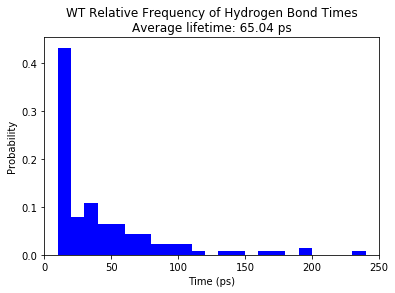

In [5]:
"""
Hydrogen bonds involving last frame are intentionally omitted 
since their duration cannot be calculated
"""

prev = hbond = count = 0 #prev tracks if hbond in previous frame, hbond is bond status, count is bond duration
sizes = [] #list of bond durations
with open("../WT/hbonds_his_ser.dat") as f:
    for line in f:
        line = line.split() #splits line by whitespace
        hbond = int(line[1])
        if hbond == 1:
            count += 1
            prev = 1
        elif hbond == 0 and prev == 1: 
            #if the hbond terminates
            sizes.append(count)
            count = prev = 0

sizes = [x*10 for x in sizes]
weights = np.ones_like(sizes)/float(len(sizes)) #weighting for relative frequency
# print(sum(sizes)/len(sizes)) #prints average lifetime


#Plotting & Saving
plt.hist(sizes, color='b', weights=weights, bins=range(10, max(sizes)+20, 10)) #generates rel. freq. histogram
plt.title("WT Relative Frequency of Hydrogen Bond Times\nAverage lifetime: {:0.2f} ps".format(sum(sizes)/len(sizes)))
plt.xlabel("Time (ps)")
plt.ylabel("Probability")
plt.xlim((0, 250))
plt.savefig('../figures/wt_hbond_times.eps', format='eps', dpi=1000)